### 1. Load Data

In [2]:
# Import our favorite libraries and modules
import matplotlib.pyplot as plt
from scipy.io import loadmat
import numpy as np

In [3]:
ds = loadmat(r"C:\dina\Computational neuroscience course\proj.6\ssvep_data_assignment.mat") # change the path based on your directory !!
print(ds.keys())

dict_keys(['__header__', '__version__', '__globals__', 'channel', 'comment', 'data', 'freq', 'fs', 'phase'])


In [4]:
a =0
data = ds['data']
sampling_freq = int(ds['fs'][0][0])
channels = ds['channel']
# event
event = {"event_freq" : ds["freq"] ,
         "event_phase": ds["phase"]}

data.shape

(64, 750, 4, 40)

### 2. Find occipital channels

In [5]:
channel_name = np.array(['OZ'])
index_of_channel = np.where(channels== channel_name)
OZ_index = int(index_of_channel[0])

C:\Users\dinak\AppData\Local\Temp\ipykernel_20036\913517767.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  OZ_index = int(index_of_channel[0])


### 3. find 8 and 12 hz with 0 phase indexes

In [6]:
a = np.where(ds['freq']== 8)
print('8 hz index:' , a[0][0])

b = np.where(ds['freq']== 12)
print('\n12 hz index:' , b[0][0])


8 hz index: 37

12 hz index: 17


In [14]:
data[61 , :, :, 37].shape

(750, 4)

In [17]:
ds_61_8hz = np.mean(data[61, :, :, 37] , axis = 1)
ds_61_12hz = np.mean(data[61, :, :, 17] , axis = 1)
ds_61_8hz.shape

(750,)

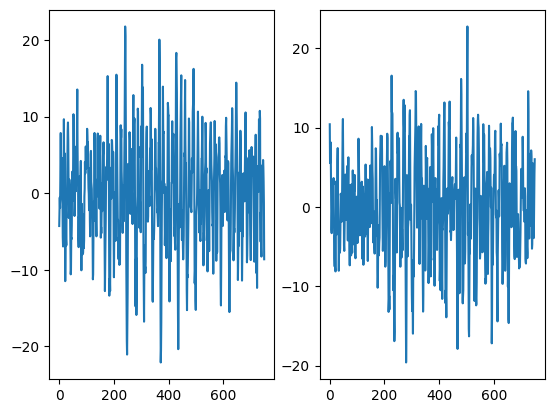

In [18]:
plt.subplot(1,2,1)
plt.plot(ds_61_8hz)

plt.subplot(1,2,2)
plt.plot(ds_61_12hz)

### 3. Power Spectrum Density (PSD) 

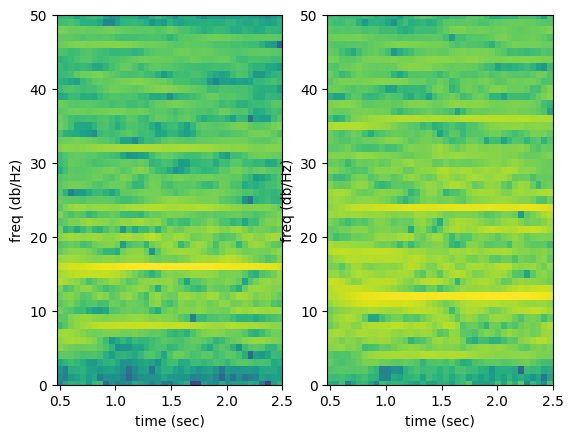

In [52]:
from scipy.signal import spectrogram
fs = ds['fs'][0][0] #250
freqs8 , times8, Sxx8 = spectrogram(ds_61_8hz, fs= fs, nperseg=fs, noverlap= 0.95 * 250)
freqs12 , times12, Sxx12 = spectrogram(ds_61_12hz, fs= fs, nperseg=fs, noverlap= 0.95 * 250)

plt.subplot(1,2,1)
plt.pcolormesh(times8, freqs8, 10*np.log10(Sxx8))
plt.xlabel('time (sec)')
plt.ylabel('freq (db/Hz)')
plt.ylim([0,50])

plt.subplot(1,2,2)
plt.pcolormesh(times12, freqs12, 10*np.log10(Sxx12))
plt.xlabel('time (sec)')
plt.ylabel('freq (db/Hz)')
plt.ylim([0,50])
plt.show()

almost 4 harmonics of 8hz signal and 3 harmonics of 12hz signal can be detected.

### 5. welch

In [53]:
from scipy import signal
f8, power_spectrum_8Hz = signal.welch(ds_61_8hz, fs, nperseg=fs)
f12, power_spectrum_12Hz = signal.welch(ds_61_12hz, fs, nperseg=fs)

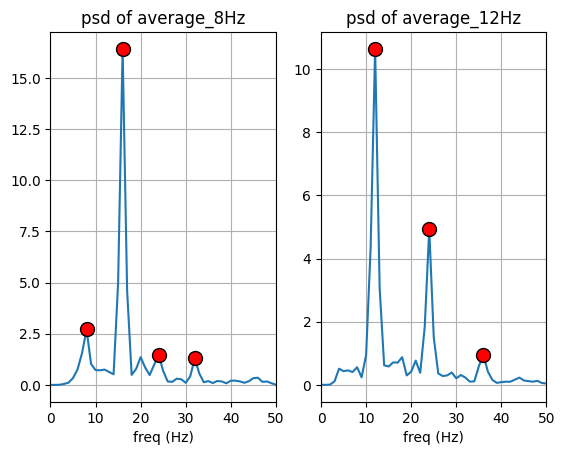

In [55]:
plt.subplot(1,2,1)
plt.plot(f8,power_spectrum_8Hz)
plt.title('psd of average_8Hz')
plt.xlim([0,50])
plt.grid(True)
plt.xlabel('freq (Hz)')
plt.plot([8, 16, 24, 32],[power_spectrum_8Hz[8], power_spectrum_8Hz[16], power_spectrum_8Hz[24], power_spectrum_8Hz[32]],
         marker = '.', 
         markersize= 20 , 
         markeredgecolor = 'k' , 
         markerfacecolor = 'r',
         linestyle='')    # Without a linestyle='' specified, Python connects the points.



plt.subplot(1,2,2)
plt.plot(f12,power_spectrum_12Hz)
plt.title('psd of average_12Hz')
plt.xlim([0,50])
plt.grid(True)
plt.xlabel('freq (Hz)')
plt.plot([12, 24, 36],[power_spectrum_12Hz[12], power_spectrum_12Hz[24], power_spectrum_12Hz[36]],
         marker = '.', 
         markersize= 20 , 
         markeredgecolor = 'k' , 
         markerfacecolor = 'r',
         linestyle='') 



plt.show()
